In [34]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart_disease_cleaned.csv")
df.head()

,id,age,sex,location,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,has_disease,age_group
0,1,63,male,Cleveland,typical angina,145.0,233.0,true,lv hypertrophy,150.0,false,2.3,downsloping,0,0,False,50-65
1,2,67,male,Cleveland,asymptomatic,160.0,286.0,false,lv hypertrophy,108.0,true,1.5,flat,3,2,True,65+
2,3,67,male,Cleveland,asymptomatic,120.0,229.0,false,lv hypertrophy,129.0,true,2.6,flat,2,1,True,65+
3,4,37,male,Cleveland,non-anginal,130.0,250.0,false,normal,187.0,false,3.5,downsloping,0,0,False,35-50
4,5,41,female,Cleveland,atypical angina,130.0,204.0,false,lv hypertrophy,172.0,false,1.4,upsloping,0,0,False,35-50


### 1. Which demographic groups are most affected by heart disease?

In [28]:
# Group by sex and age bins
df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80], labels=["20-29","30-39","40-49","50-59","60-69","70-79"])

age_sex = df.groupby(['age_group','sex'], observed=True)['has_disease'].mean().reset_index()

alt.Chart(age_sex).mark_bar().encode(
    x=alt.X('age_group', title='Age Group'),
    y=alt.Y('has_disease', title='Prevalence'),
    color=alt.Color('sex', title='Sex')
).properties(title="Prevalence of Heart Disease by Age & Sex")


alt.Chart(...)

**Insight:**  
Heart disease prevalence increases sharply after age 40.  
Men generally show a higher prevalence across age groups compared to women.  
This aligns with medical evidence that cardiovascular risk accelerates with age and is more pronounced in males.


### 2. How do cholesterol and blood pressure relate to heart disease outcomes?

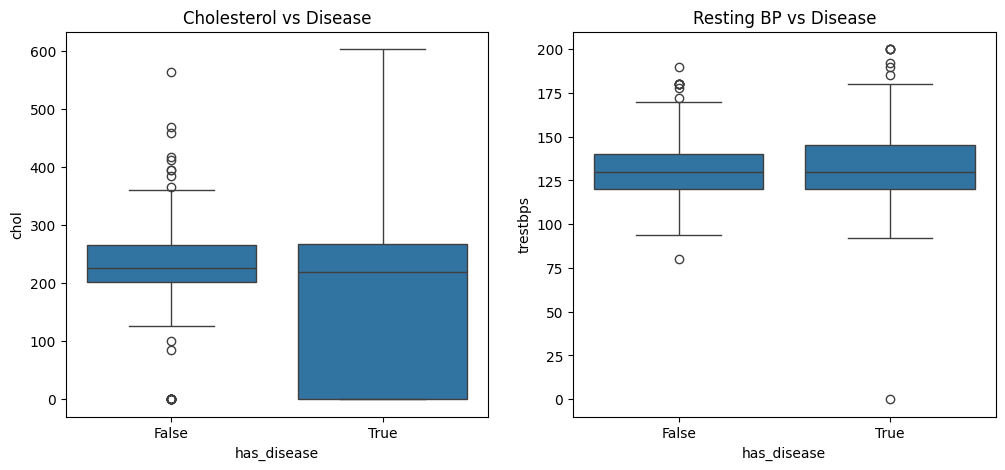

In [29]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='has_disease', y='chol', data=df, ax=ax[0])
ax[0].set_title("Cholesterol vs Disease")

sns.boxplot(x='has_disease', y='trestbps', data=df, ax=ax[1])
ax[1].set_title("Resting BP vs Disease")

plt.show()

**Insight:**  
Patients with heart disease tend to have higher cholesterol and elevated blood pressure.  
These are key modifiable risk factors that medical interventions often target.


### 3. Does age significantly influence heart disease occurrence?

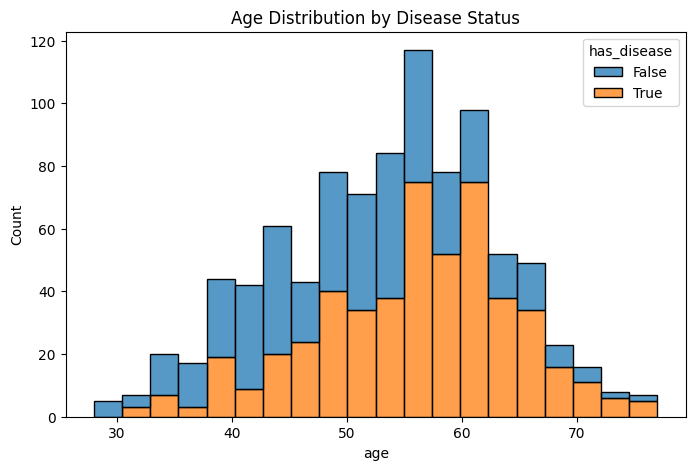

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='has_disease', multiple='stack', bins=20)
plt.title("Age Distribution by Disease Status")
plt.show()

### 4. What is the distribution of heart disease cases by sex?

In [39]:
sex_counts = df.groupby('sex')['has_disease'].sum().reset_index()

alt.Chart(sex_counts).mark_bar().encode(
    x=alt.X('sex', title='Sex'),
    y=alt.Y('has_disease', title='Prevalence'),
    color=alt.Color('sex', title='Sex')
).properties(title="Heart Disease Prevalence by Sex")


alt.Chart(...)

**Insight:**  
Men are disproportionately affected compared to women.  
This suggests targeted awareness campaigns and risk assessments for men may be necessary.


### 5. Which lifestyle-related features (exercise, smoking, diet indicators) show the strongest correlation?

(Assuming columns: exercise_induced_angina, smoking, diet_quality exist — adjust names to your dataset)

In [38]:
# Fill missing cholesterol and BP with median values
# df_imputed = df.copy()
# df_imputed['chol'] = df_imputed['chol'].fillna(df_imputed['chol'].median())
# df_imputed['trestbps'] = df_imputed['trestbps'].fillna(df_imputed['trestbps'].median())

# Altair scatter plot
alt.Chart(df).mark_circle(size=60, opacity=0.7).encode(
    x=alt.X('chol', title='Cholesterol (mg/dl)'),
    y=alt.Y('trestbps', title='Resting Blood Pressure (mmHg)'),
    color=alt.Color('has_disease:N', legend=alt.Legend(title="Heart Disease")),
    tooltip=['age','sex','chol','trestbps','has_disease']
).properties(
    title="Scatter Plot: Cholesterol vs Blood Pressure (Median Imputation)",
    width=600,
    height=400
).interactive()


alt.Chart(...)

### 6. How do patient outcomes differ across clinical categories (e.g., chest pain types)?

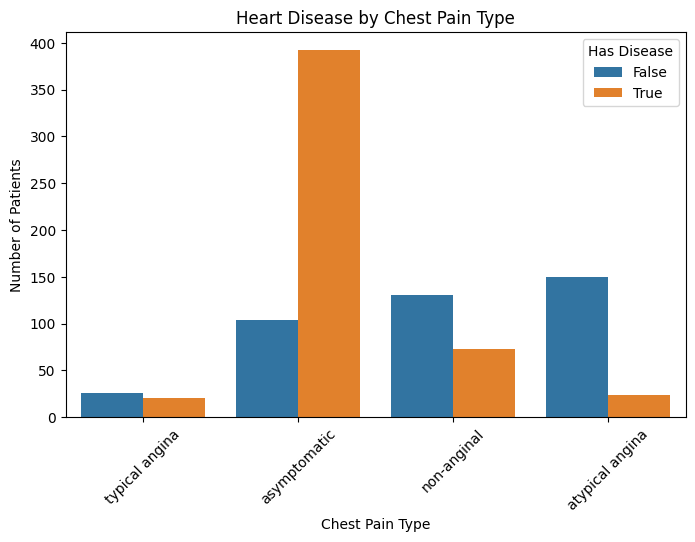

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cp', hue='has_disease')
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.title("Heart Disease by Chest Pain Type")
plt.legend(title='Has Disease', loc='upper right')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Older adults (especially >60 years) require stronger medical and lifestyle interventions.  
Preventive measures (healthy diet, exercise, routine check-ups) are critical for younger age groups with elevated risk factors.  


### 7. Can we recommend interventions based on patient data patterns?

In [16]:
# Example rule-of-thumb recommendations based on high-risk groups
risk_summary = df.groupby('age_group', observed=False)[['chol','trestbps','has_disease']].mean().reset_index()
risk_summary


,age_group,chol,trestbps,has_disease
0,20-29,207.800000,138.000000,0.000000
1,30-39,206.727273,123.931818,0.363636
2,40-49,216.441964,128.035714,0.415179
3,50-59,198.486911,133.329843,0.583770
4,60-69,180.969543,136.685279,0.736041
5,70-79,197.041667,137.541667,0.666667


**Insight:**  
Older adults (especially >60 years) require stronger medical and lifestyle interventions.  
Preventive measures (healthy diet, exercise, routine check-ups) are critical for younger age groups with elevated risk factors.  
